In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [6]:
df = pd.read_csv(os.path.join("enron_salary_numeric.csv"))
df.head()

,name,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
0,METTS MARK,365788.0,807.0,0.0,1061827.0,0.0,600000.0,585062.0,702.0,0.0,...,0.0,29.0,1740.0,1.0,False,0.0,0.0,0.0,mark.metts@enron.com,38.0
1,BAXTER JOHN C,267102.0,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,0.0,0.0,...,0.0,0.0,2660303.0,0.0,False,0.0,-1386055.0,1586055.0,0,0.0
2,ELLIOTT STEVEN,170941.0,0.0,0.0,211725.0,4890344.0,350000.0,1788391.0,0.0,0.0,...,0.0,0.0,12961.0,0.0,False,0.0,-400729.0,0.0,steven.elliott@enron.com,0.0
3,CORDES WILLIAM R,0.0,764.0,0.0,0.0,651850.0,0.0,386335.0,58.0,0.0,...,0.0,12.0,0.0,0.0,False,0.0,0.0,0.0,bill.cordes@enron.com,10.0
4,HANNON KEVIN P,243293.0,1045.0,0.0,288682.0,5538001.0,1500000.0,853064.0,1035.0,0.0,...,0.0,32.0,11350.0,21.0,True,0.0,-3117011.0,1617011.0,kevin.hannon@enron.com,32.0


In [9]:
# Drop Total/Travel Agency Column
df = df[df.name != 'TOTAL']
 
df = df[df.name != 'THE TRAVEL AGENCY IN THE PARK']

In [11]:
# Drop non numeric columns
drop_columns = ['name', 'email_address']
df.drop(drop_columns, inplace=True, axis=1)
df.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
0,365788.0,807.0,0.0,1061827.0,0.0,600000.0,585062.0,702.0,0.0,585062.0,94299.0,0.0,29.0,1740.0,1.0,False,0.0,0.0,0.0,38.0
1,267102.0,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,0.0,0.0,10623258.0,11200.0,0.0,0.0,2660303.0,0.0,False,0.0,-1386055.0,1586055.0,0.0
2,170941.0,0.0,0.0,211725.0,4890344.0,350000.0,1788391.0,0.0,0.0,6678735.0,78552.0,0.0,0.0,12961.0,0.0,False,0.0,-400729.0,0.0,0.0
3,0.0,764.0,0.0,0.0,651850.0,0.0,386335.0,58.0,0.0,1038185.0,0.0,0.0,12.0,0.0,0.0,False,0.0,0.0,0.0,10.0
4,243293.0,1045.0,0.0,288682.0,5538001.0,1500000.0,853064.0,1035.0,0.0,6391065.0,34039.0,0.0,32.0,11350.0,21.0,True,0.0,-3117011.0,1617011.0,32.0


In [12]:
y = df["poi"]
target_names = ["False", "True"]

In [13]:
X = df.drop("poi", axis=1)
X.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
0,365788.0,807.0,0.0,1061827.0,0.0,600000.0,585062.0,702.0,0.0,585062.0,94299.0,0.0,29.0,1740.0,1.0,0.0,0.0,0.0,38.0
1,267102.0,0.0,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,0.0,0.0,10623258.0,11200.0,0.0,0.0,2660303.0,0.0,0.0,-1386055.0,1586055.0,0.0
2,170941.0,0.0,0.0,211725.0,4890344.0,350000.0,1788391.0,0.0,0.0,6678735.0,78552.0,0.0,0.0,12961.0,0.0,0.0,-400729.0,0.0,0.0
3,0.0,764.0,0.0,0.0,651850.0,0.0,386335.0,58.0,0.0,1038185.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,10.0
4,243293.0,1045.0,0.0,288682.0,5538001.0,1500000.0,853064.0,1035.0,0.0,6391065.0,34039.0,0.0,32.0,11350.0,21.0,0.0,-3117011.0,1617011.0,32.0


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.806
k: 3, Train/Test Score: 0.926/0.833
k: 5, Train/Test Score: 0.907/0.861
k: 7, Train/Test Score: 0.889/0.833
k: 9, Train/Test Score: 0.889/0.833
k: 11, Train/Test Score: 0.889/0.833
k: 13, Train/Test Score: 0.889/0.833
k: 15, Train/Test Score: 0.889/0.833
k: 17, Train/Test Score: 0.889/0.833
k: 19, Train/Test Score: 0.889/0.833


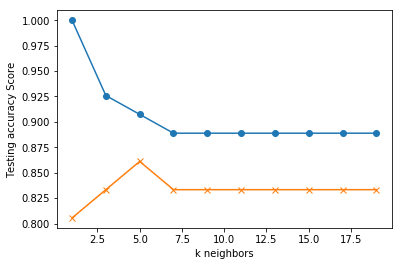

In [24]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [26]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('K=7 Test Acc: %.3f' % knn.score(X_test, y_test))

K=7 Test Acc: 0.833
